Lesson 13-1
===

Начало работы с Plotly

```pip install plotly```

```pip install ipywidgets```

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


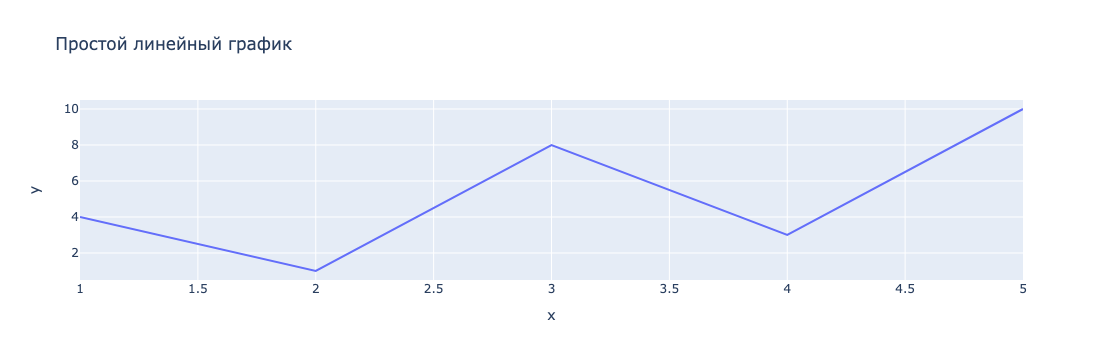

In [1]:
import plotly.express as px

data = {'x': [1, 2, 3, 4, 5], 'y': [4, 1, 8, 3, 10]}
fig = px.line(data, x='x', y='y', title='Простой линейный график')
fig.show()



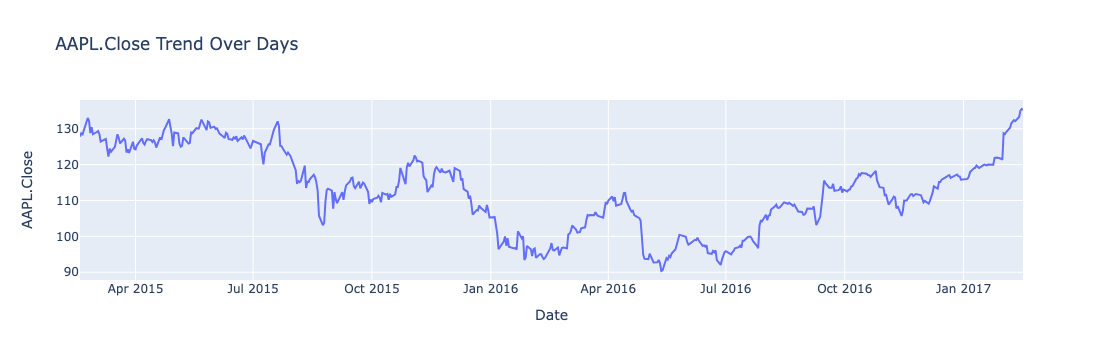

In [4]:
# Line chart
import plotly.express as px
import pandas as pd

df = pd.read_csv(
    'https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv'
)

fig = px.line(df, x='Date', y='AAPL.Close', title='AAPL.Close Trend Over Days')
fig.show()



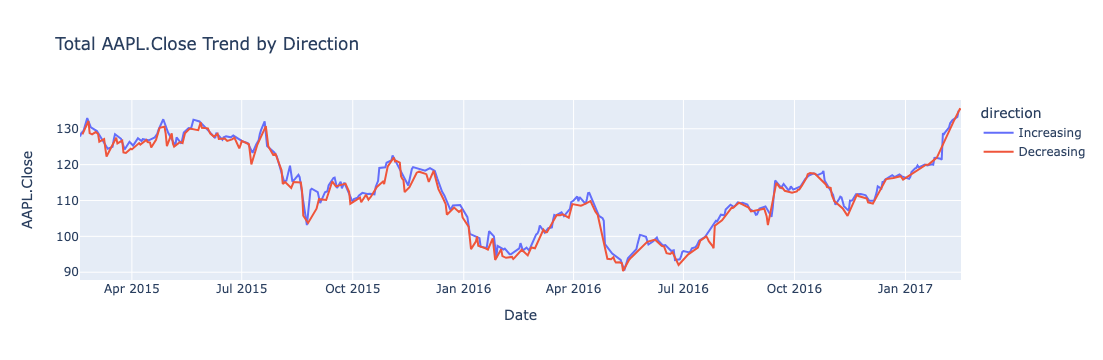

In [5]:
# многолинейные диаграмы
fig = px.line(df, x='Date', y='AAPL.Close', color='direction', title='Total AAPL.Close Trend by Direction')
fig.show()



Добавление маркеров и стилей

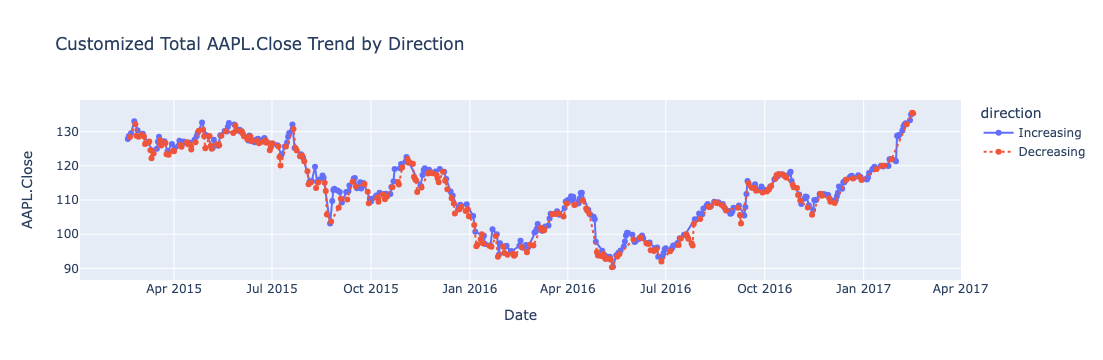

In [6]:
fig = px.line(df, x='Date', y='AAPL.Close', color='direction', 
              title='Customized Total AAPL.Close Trend by Direction',
              markers=True, line_dash='direction')
fig.show()



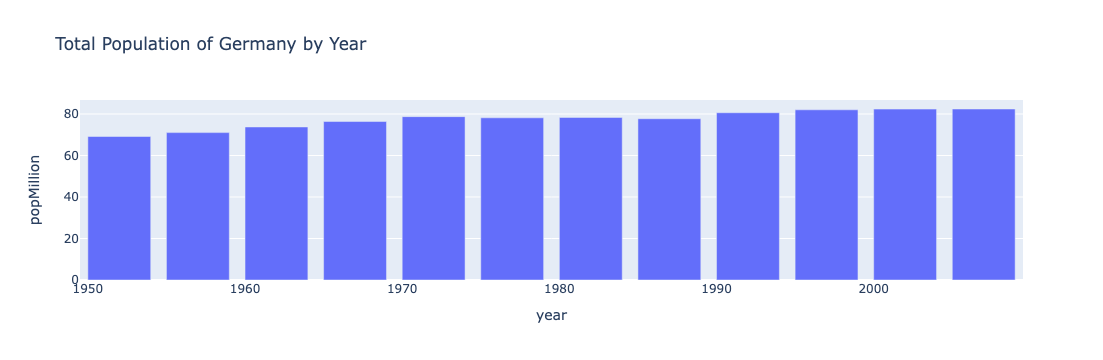

In [7]:
#Bar charts
df = px.data.gapminder().query("country=='Germany'")
df['popMillion'] = df['pop']/1000000

fig = px.bar(df, x='year', y='popMillion', title='Total Population of Germany by Year')
fig.show()


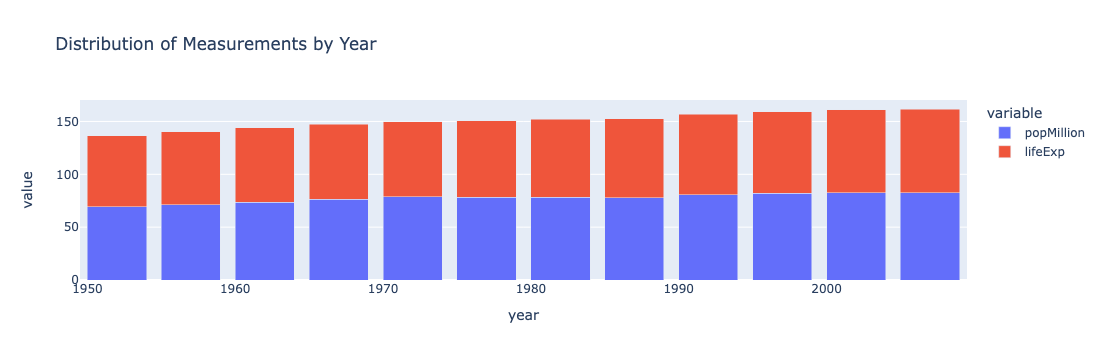

In [8]:
#Сложенные столбчатые диаграммы
fig = px.bar(df, x='year', y=['popMillion', 'lifeExp'],
             title='Distribution of Measurements by Year', barmode='stack')
fig.show()



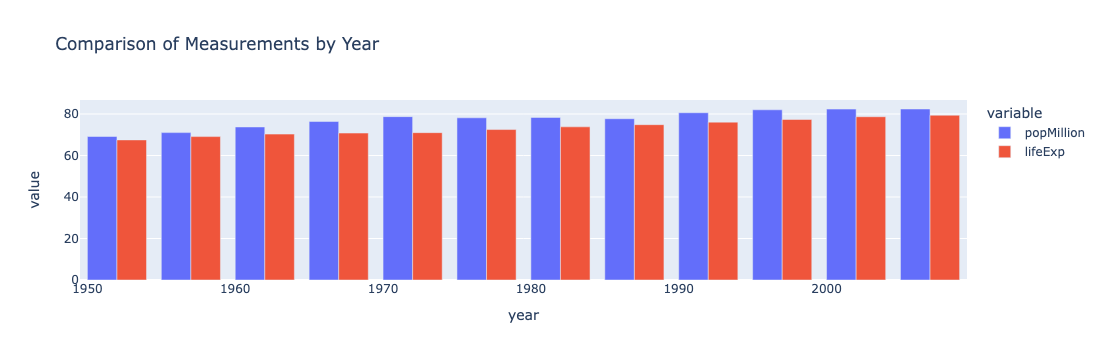

In [11]:
fig = px.bar(df, x='year', y=['popMillion', 'lifeExp'],
             title='Comparison of Measurements by Year', barmode='group')
fig.show()

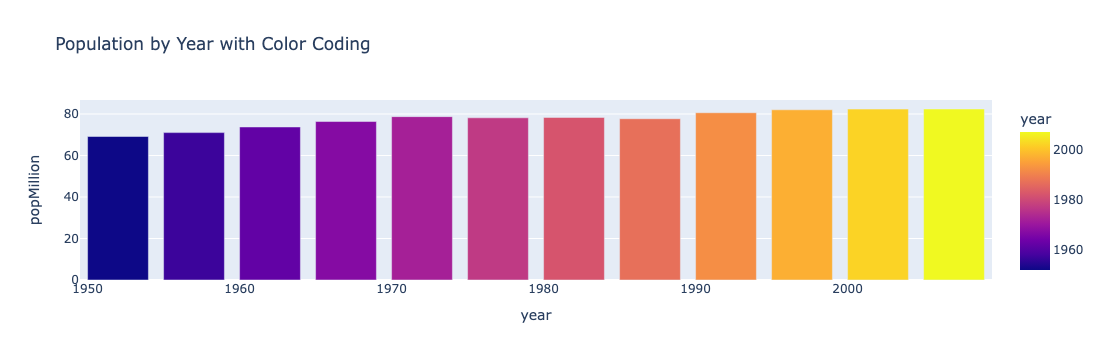

In [12]:
# добавим цвет 
fig = px.bar(df, x='year', y='popMillion', color='year',
             title='Population by Year with Color Coding')
fig.show()




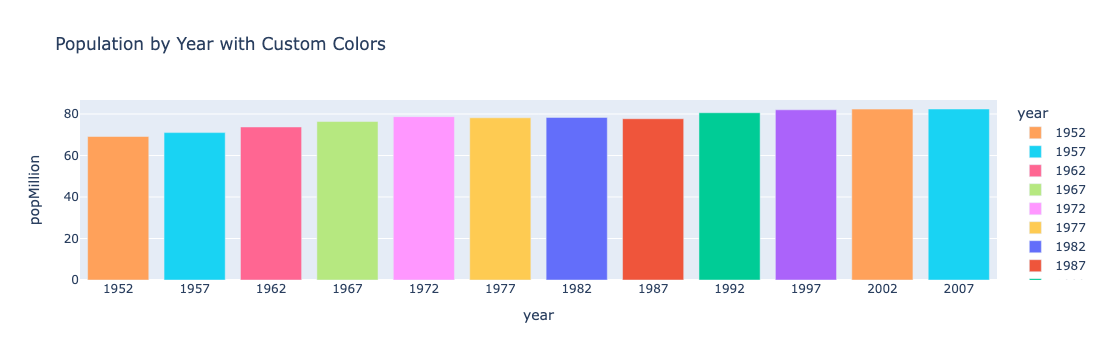

In [20]:
df['year'] = df['year'].astype(str)


custom_colors = {
    '2020': '#ff9999',
    '2021': '#66b3ff',
    '2022': '#99ff99',
    '2023': '#ffcc99'
}


fig = px.bar(
    df, x='year', y='popMillion', color='year',
    title='Population by Year with Custom Colors',
    color_discrete_map=custom_colors
)

#fig.update_layout(template=None)

fig.show()

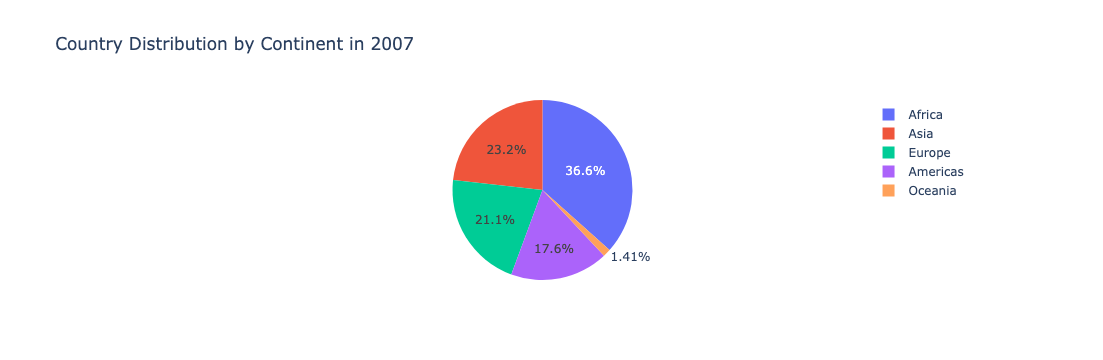

In [21]:
#Круговые диаграммы

gapminder = px.data.gapminder()

gapminder_2007 = gapminder[gapminder['year'] == 2007]

fig = px.pie(gapminder_2007, names='continent', title='Country Distribution by Continent in 2007')
fig.show()

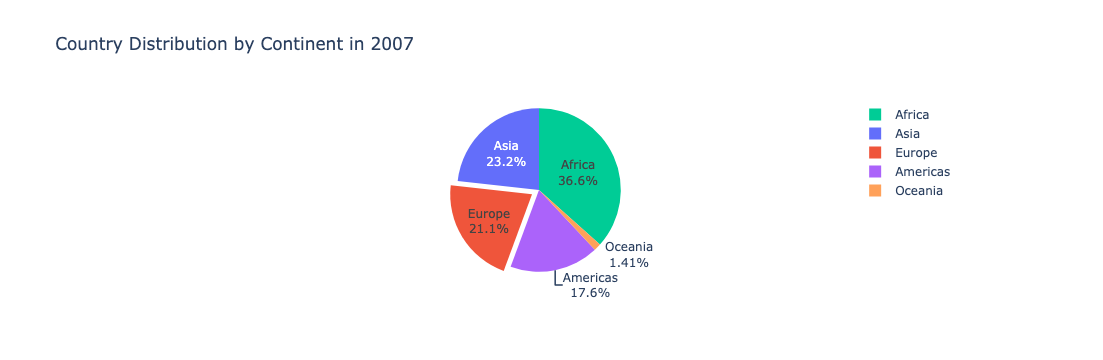

In [22]:
#настройка
fig = px.pie(gapminder_2007, names='continent', color='continent',
             title='Country Distribution by Continent in 2007',
             hover_data=['country'], labels={'country':'Country Name'})
fig.update_traces(textinfo='percent+label', pull=[0, 0.1, 0, 0, 0])
fig.show()

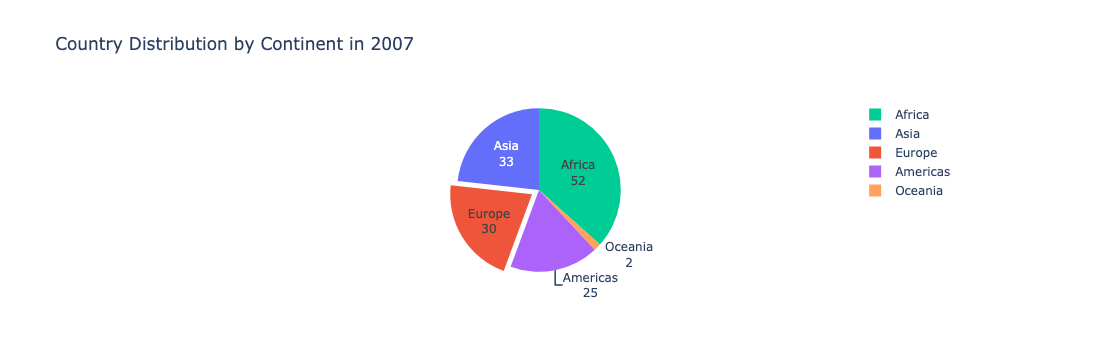

In [23]:
#настройка
fig = px.pie(gapminder_2007, names='continent', color='continent',
             title='Country Distribution by Continent in 2007',
             hover_data=['country'], labels={'country':'Country Name'})
fig.update_traces(textinfo='value+label', pull=[0, 0.1, 0, 0, 0])
fig.show()

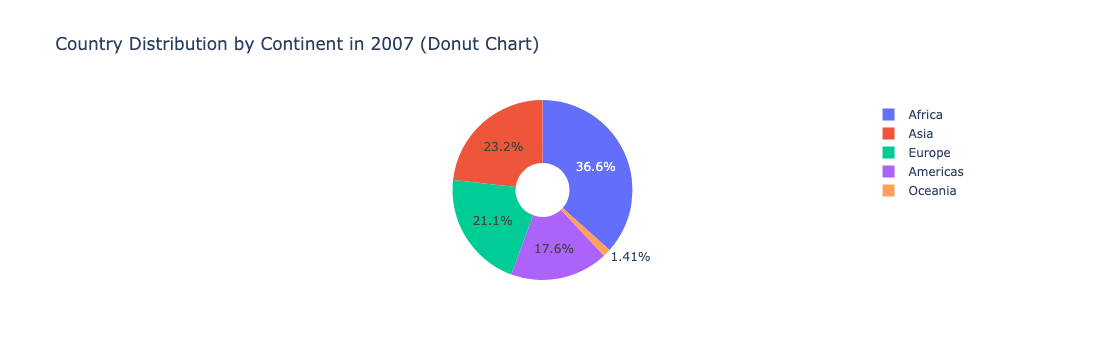

In [24]:
# пончиковая диаграмма
fig = px.pie(gapminder_2007, names='continent', hole=0.3,
             title='Country Distribution by Continent in 2007 (Donut Chart)')
fig.show()



Интерактивные возможности в Plotly: Масштабирование и панорамирование

Решение задач
--

Постройте line chart для функции y = sin(x) и обозначте маркерами основные точки, по которым он строился.


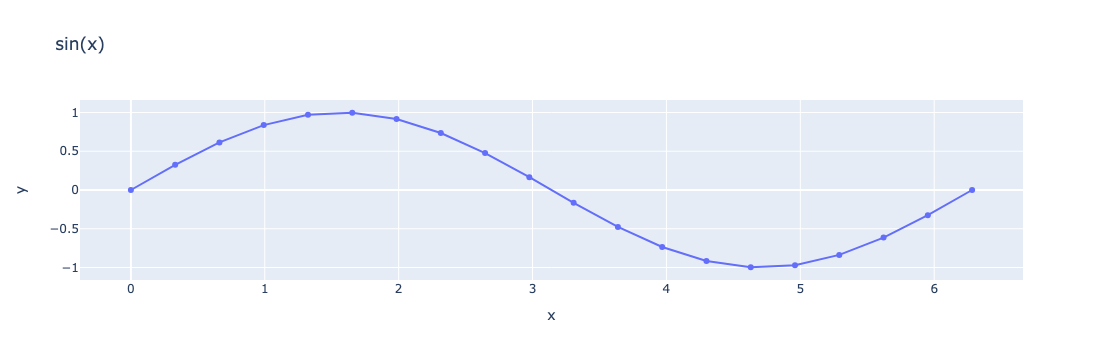

In [26]:
import numpy as np
main_points_x = np.linspace(0, 2*np.pi, 20)
main_points_y = np.sin(main_points_x)

df = pd.DataFrame({'x': main_points_x, 'y': main_points_y})

fig = px.line(df, x='x', y='y', 
              title='sin(x)',
              markers=True)
fig.show()


Lesson 13-2
--

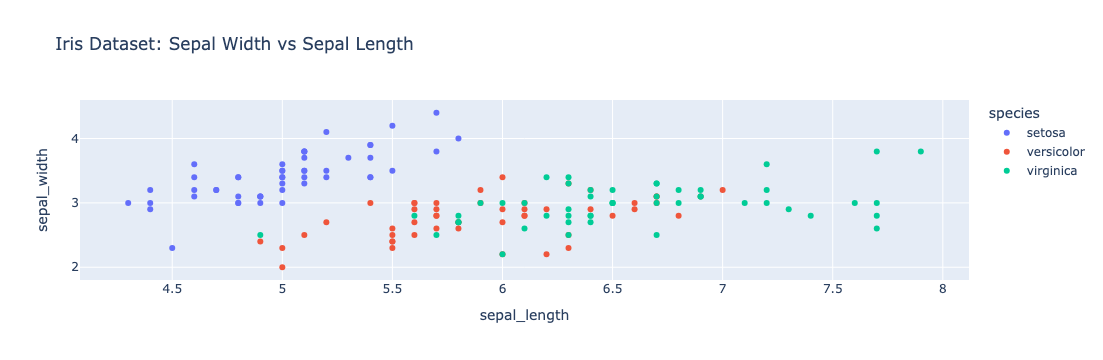

In [27]:
# Scatter plot

iris = px.data.iris()

fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species', title='Iris Dataset: Sepal Width vs Sepal Length')
fig.show()


Пузырьковые диаграммы - это расширение диаграмм рассеивания, где размер каждого маркера (пузырька) может представлять дополнительное измерение данных.


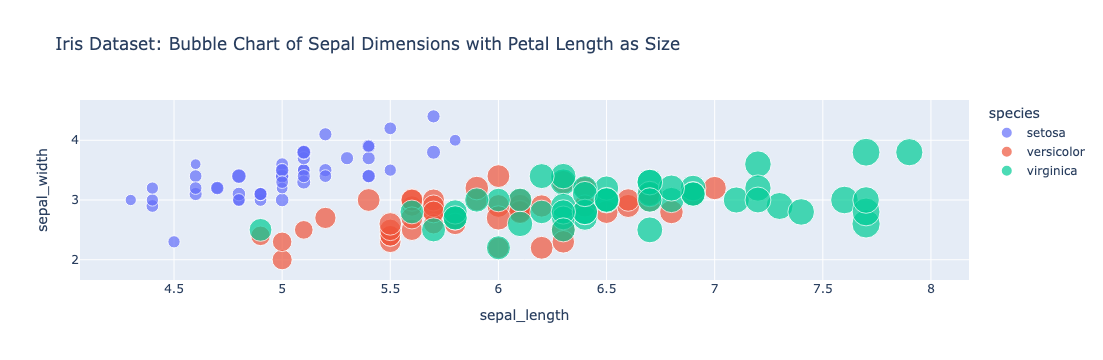

In [28]:
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species',
                 size='petal_length', 
                 title='Iris Dataset: Bubble Chart of Sepal Dimensions with Petal Length as Size')
fig.show()



Для дальнейшего анализа тенденций на диаграммах рассеяния можно добавить линии тренда или линии подгонки. Для этого необходимо дополнительно установить модуль statsmodels.

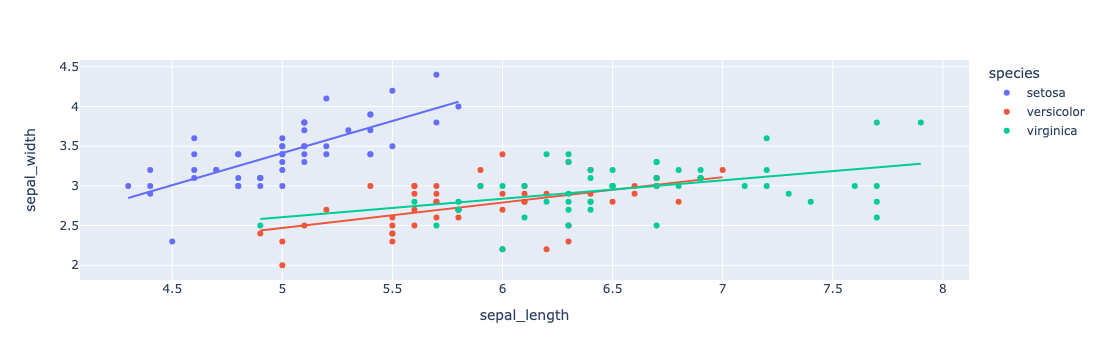

In [29]:
fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species',
                 trendline='ols')  # Ordinary Least Squares regression line
fig.show()

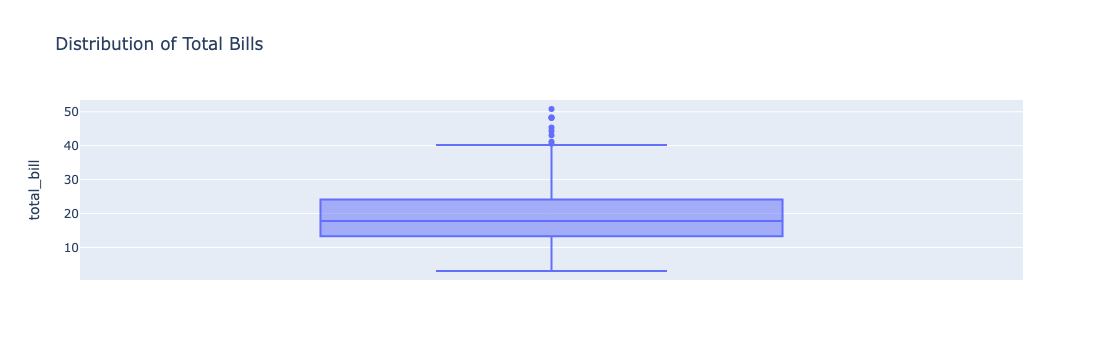

In [30]:
#Box plot
tips = px.data.tips()

fig = px.box(tips, y='total_bill', title='Distribution of Total Bills')
fig.show()



Графики можно группировать по категориальной переменной для сравнения распределений по разным категориям.

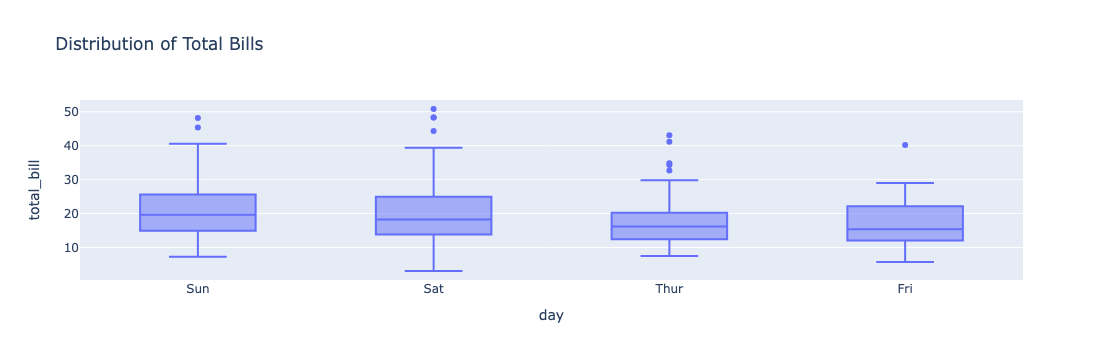

In [31]:
fig = px.box(tips, x='day', y='total_bill', title='Distribution of Total Bills')
fig.show()



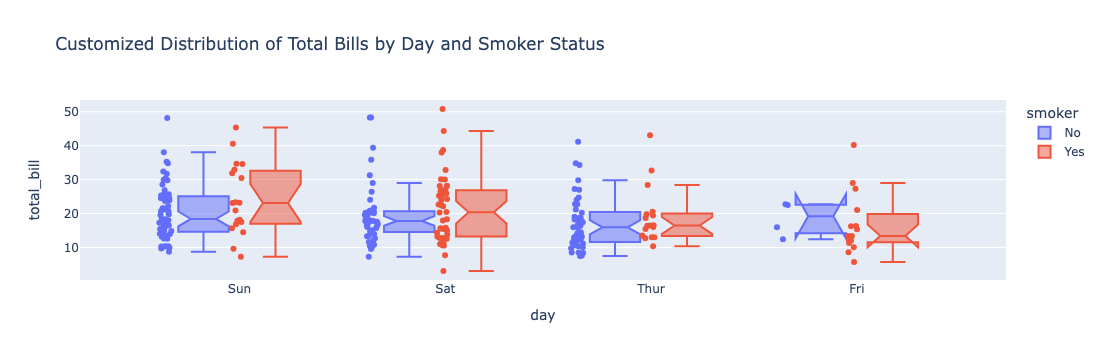

In [32]:
#настройка
fig = px.box(tips, x='day', y='total_bill', color='smoker',
             notched=True,  # Добавляет засечки для обозначения доверительного интервала вокруг медианы
             points='all',  # Отображает все точки на боксплоте
             title='Customized Distribution of Total Bills by Day and Smoker Status')
fig.show()

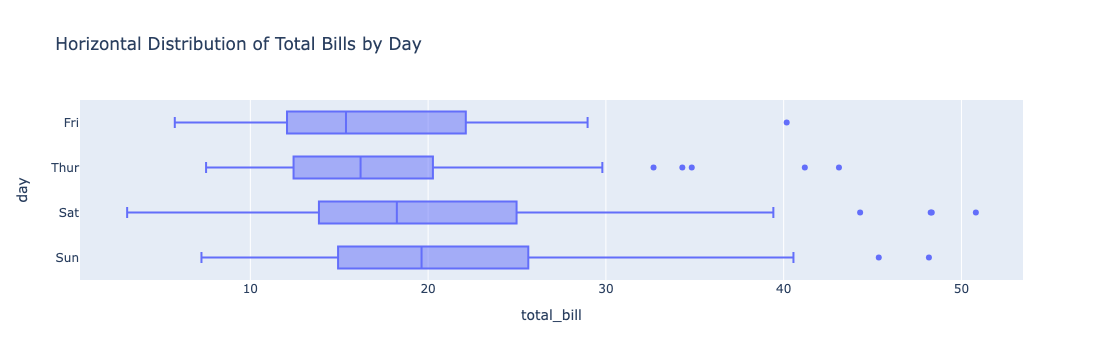

In [33]:
# горизонтальная ориентация
fig = px.box(tips, x='total_bill', y='day', orientation='h',  # Устанавливает горизонтальную ориентацию
             title='Horizontal Distribution of Total Bills by Day')
fig.show()



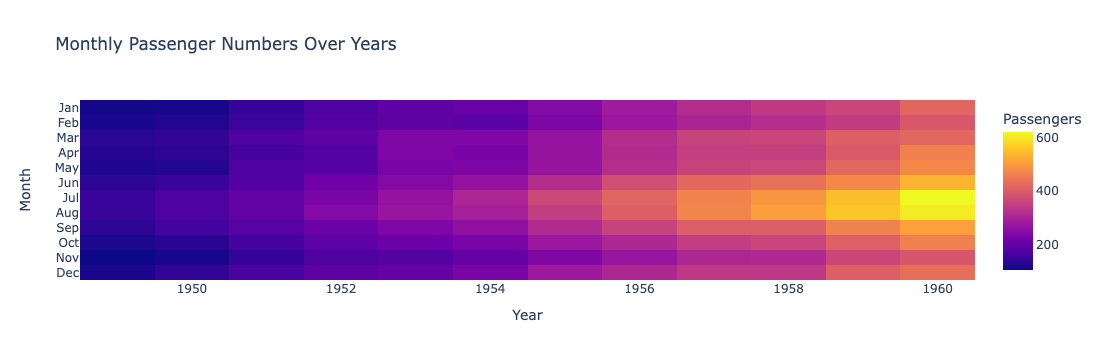

In [35]:
#Heatmap
import seaborn as sns

flights = sns.load_dataset("flights")

fig = px.imshow(flights.pivot_table(index='month', columns='year', values='passengers'),
                labels=dict(x="Year", y="Month", color="Passengers"),
                title='Monthly Passenger Numbers Over Years')
fig.show()


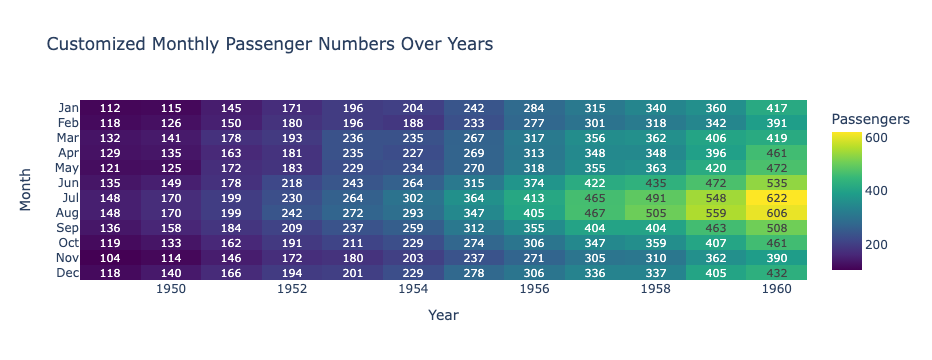

In [36]:
fig = px.imshow(flights.pivot_table(index='month', columns='year', values='passengers'),
                labels=dict(x="Year", y="Month", color="Passengers"),
                title='Customized Monthly Passenger Numbers Over Years',
                aspect="auto",  # Настраивает соотношение сторон
                color_continuous_scale='Viridis', # Изменяет цветовую шкалу
                text_auto=True) # Добавляет аннотации
fig.show()

Sunburst charts

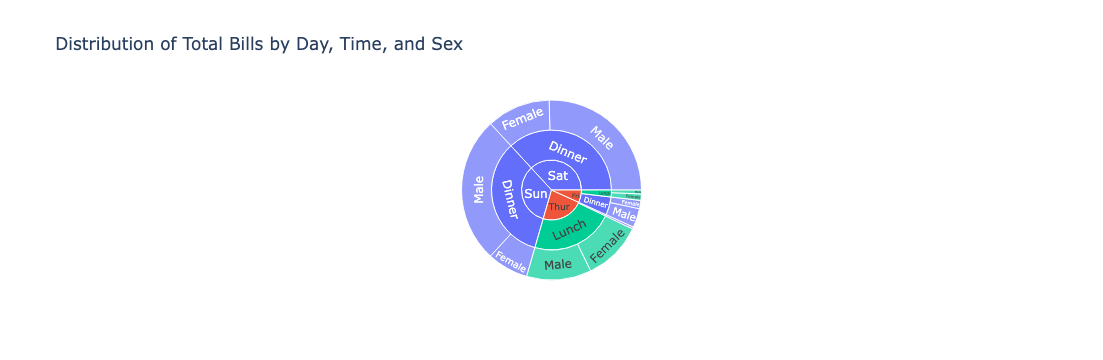

In [37]:
tips = px.data.tips()

fig = px.sunburst(tips, path=['day', 'time', 'sex'], values='total_bill',
                  color='time', title='Distribution of Total Bills by Day, Time, and Sex')
fig.show()


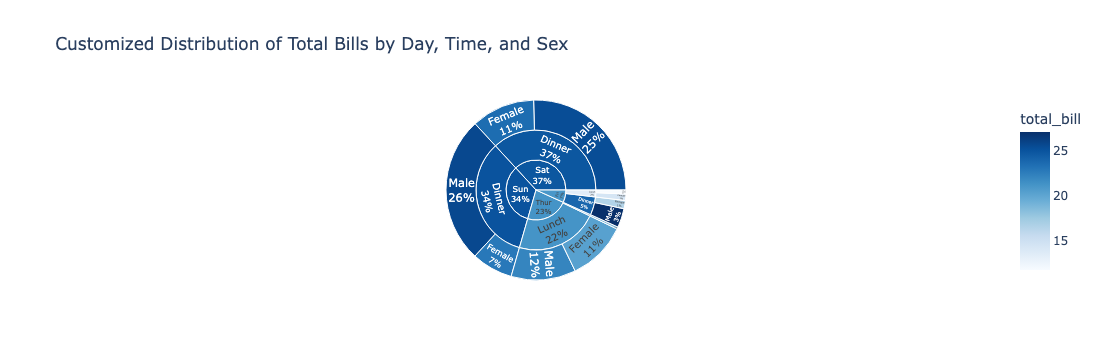

In [38]:
fig = px.sunburst(tips, path=['day', 'time', 'sex'], values='total_bill',
                  color='total_bill',  # Теперь раскраска по общей сумме счета
                  color_continuous_scale='Blues',   # Изменяет цветовую шкалу
                  title='Customized Distribution of Total Bills by Day, Time, and Sex')
fig.update_traces(textinfo='label+percent entry')  # Показывает метки и процент на каждом уровне

fig.show()



Настройка графиков в Plotly
---


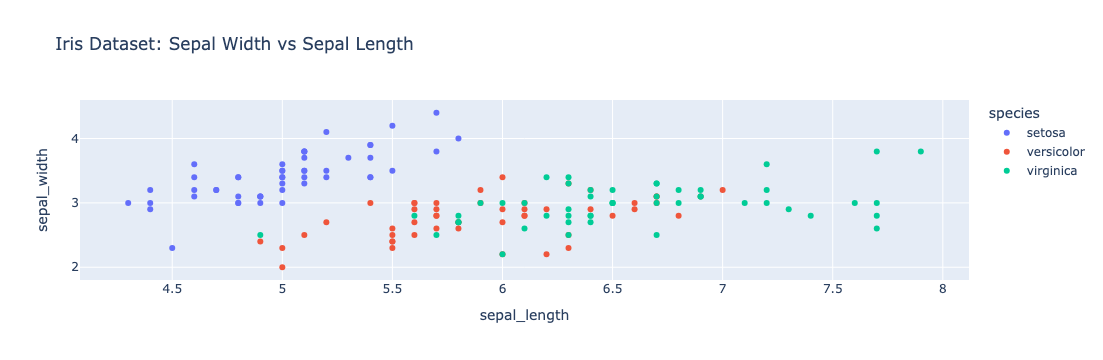

In [39]:

iris = px.data.iris()

fig = px.scatter(iris, x='sepal_length', y='sepal_width', color='species', title='Iris Dataset: Sepal Width vs Sepal Length')
fig.show()


Добавление понятных заголовков и меток осей очень важно для того, чтобы сделать графики понятными.


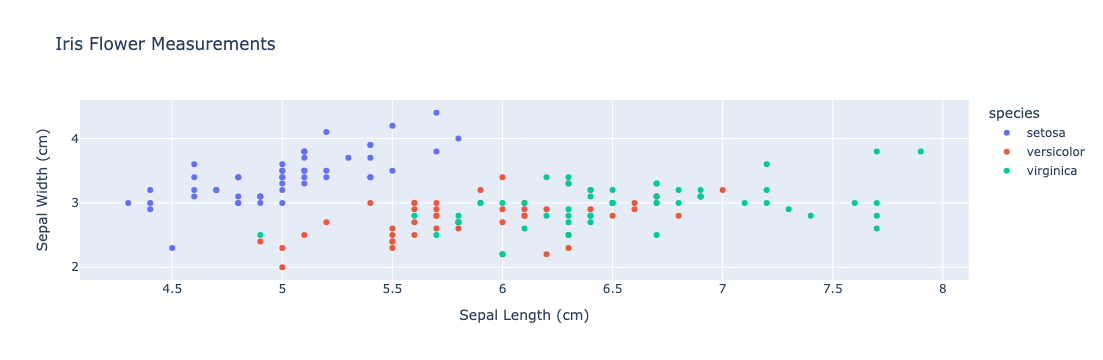

In [40]:
fig.update_layout(
    title='Iris Flower Measurements',
    xaxis_title='Sepal Length (cm)',
    yaxis_title='Sepal Width (cm)'
)
fig.show()

Легенды необходимы для графиков с несколькими категориями или цветами. Они помогают определить, что представляет собой каждый элемент графика.



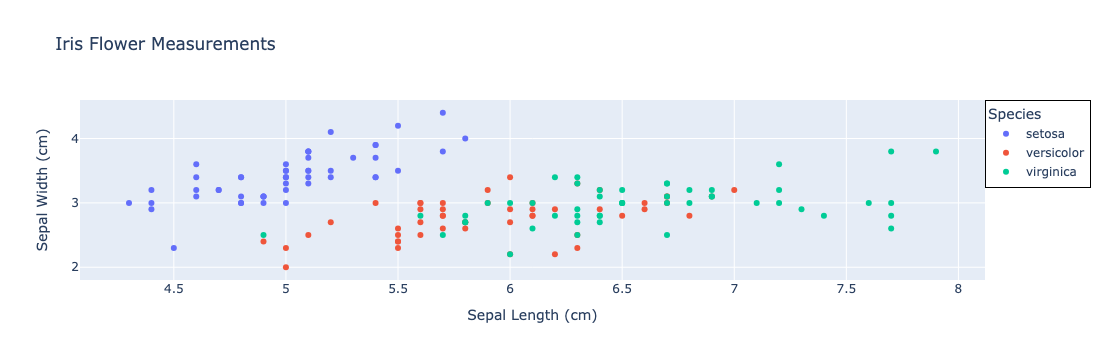

In [41]:
fig.update_layout(
    legend_title='Species',
    legend=dict(
        x=1,  # Положение легенды по горизонтали (1 - крайний справа)
        y=1,  # Положение легенды по вертикали (1 - верхняя)
        bordercolor='Black',
        borderwidth=1
    )
)
fig.show()



Аннотации могут использоваться для выделения определенных точек или особенностей на графике, добавляя ценные сведения.


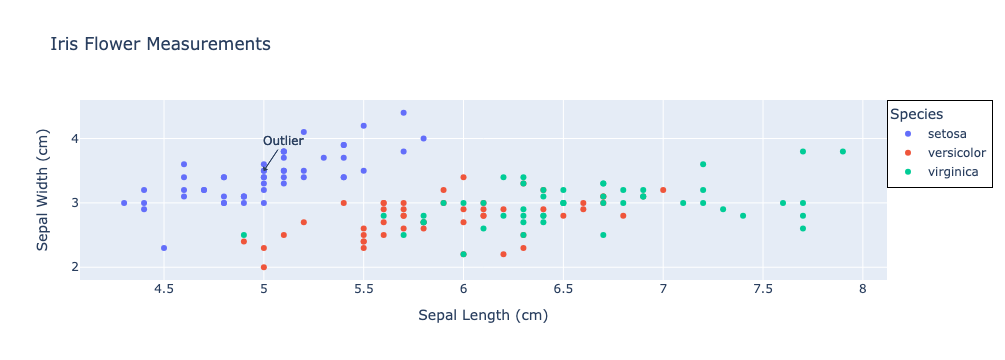

In [44]:
fig.add_annotation(
    x=5, y=3.5,
    text="Outlier",
    showarrow=True,
    arrowhead=1,
    ax=20, # Положение хвоста стрелки (сдвиг по оси x)
    ay=-30  # Положение хвоста стрелки (сдвиг по оси y)
)
fig.show()



Вы можете дополнительно настроить внешний вид графика, чтобы сделать его более визуально привлекательным.


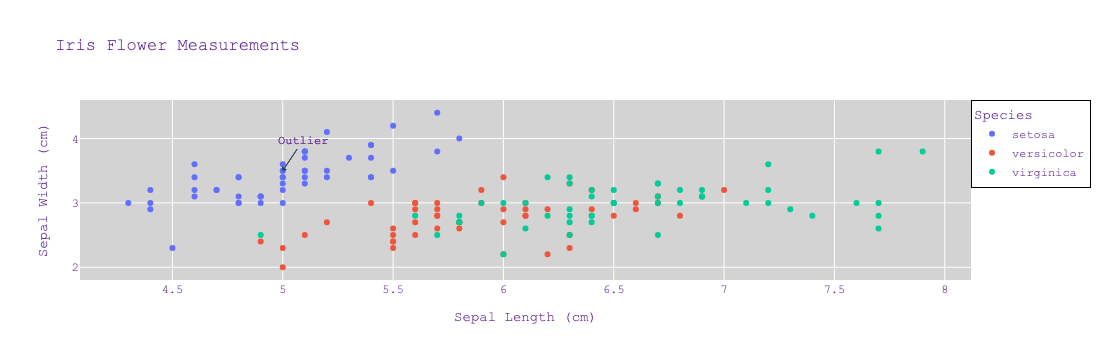

In [45]:
fig.update_layout(
    plot_bgcolor='lightgrey',  # Цвет фона области построения
    paper_bgcolor='white',     # Цвет фона за пределами области построения
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    )
)
fig.show()



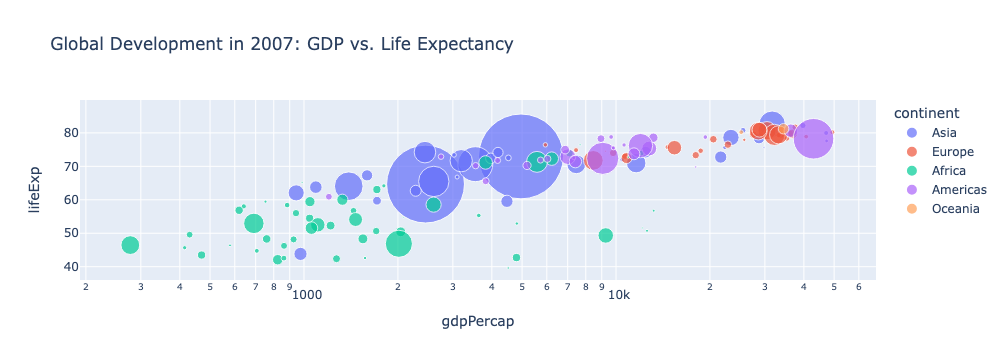

In [3]:
import plotly.express as px

gapminder = px.data.gapminder().query("year == 2007")

fig = px.scatter(gapminder, x='gdpPercap', y='lifeExp', size='pop', color='continent',
                 hover_name='country', log_x=True, size_max=60,
                 title='Global Development in 2007: GDP vs. Life Expectancy')

fig.show()

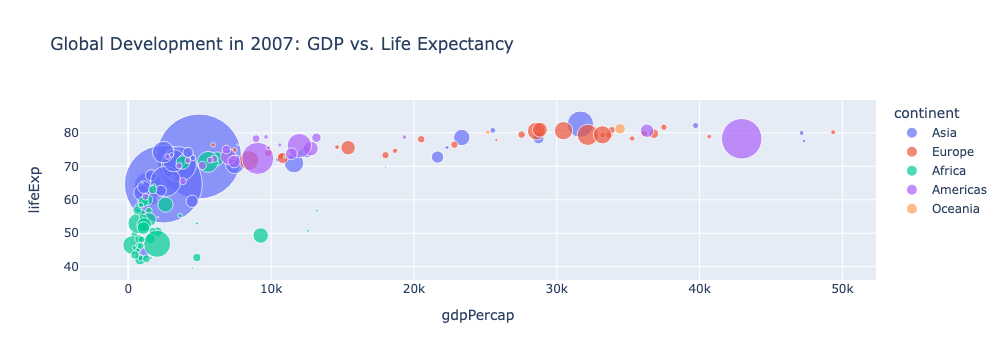

In [4]:
import plotly.express as px

gapminder = px.data.gapminder().query("year == 2007")

fig = px.scatter(gapminder, x='gdpPercap', y='lifeExp', size='pop', color='continent',
                 hover_name='country',  size_max=60,
                 title='Global Development in 2007: GDP vs. Life Expectancy')

fig.show()

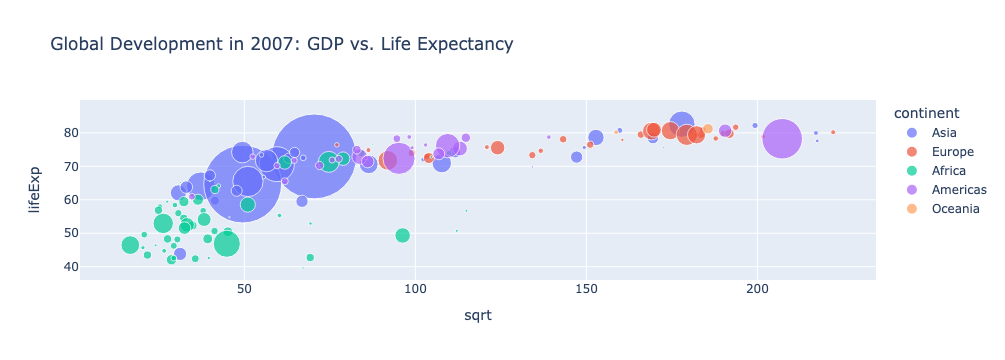

In [6]:
import plotly.express as px
import numpy as np

gapminder = px.data.gapminder().query("year == 2007")
gapminder['sqrt'] = np.sqrt(gapminder['gdpPercap'])

fig = px.scatter(gapminder, x='sqrt', y='lifeExp', size='pop', color='continent',
                 hover_name='country', size_max=60,
                 title='Global Development in 2007: GDP vs. Life Expectancy')

fig.show()

In [7]:
(9-4) > (3-2)

True